In [1]:
# Dependencies and set up
import pandas as pd
import os
import matplotlib.pyplot as plt
import geoviews as gv
import numpy as np

# I think that's it

In [2]:
# Build up the first dataframe from Nathon's lovely main dataset csv.
csv_filepath = os.path.join('..', 'Outputs', 'Main_Data_Set_Cleaned.csv')
brewery_cost_df = pd.read_csv(csv_filepath,delimiter=",")
brewery_cost_df.dropna(inplace=True)
brewery_cost_df

,City,State,Country,2021 Pop. Estimate,Pop. Growth (%),Brewery ID,Brewery Name,Brewery Type,# Breweries in City,Beer Style,...,Basic Utilities,Internet,1bd Apt. (City Center),1bd Apt. (Outside Center),3bd Apt. (City Center),3bd Apt. (Outside Center),Avg. Monthly Income (After Tax),Base Pop. Estimate,2020 Pop. Estimate,website
2,Bend,Oregon,United States,102059,3.0,408,10 Barrel Brewing Company,large,20.0,American Pale Lager,...,173.470,81.280,2300.000,1850.000,3375.000,2760.000,3163.00,99126,99533,http://www.10barrel.com
3,Bend,Oregon,United States,102059,3.0,454,Deschutes Brewery,regional,20.0,American Pale Ale (APA),...,173.470,81.280,2300.000,1850.000,3375.000,2760.000,3163.00,99126,99533,http://www.deschutesbrewery.com
5,Frederick,Maryland,United States,79588,2.0,521,Flying Dog Brewery,regional,20.0,American IPA,...,300.000,80.500,1600.000,1400.000,2800.000,2000.000,4232.00,78062,78215,http://www.flyingdogbrewery.com
6,Tempe,Arizona,United States,184118,2.0,160,Four Peaks Brewing Company,large,9.0,Kölsch,...,209.470,77.985,1725.000,1762.500,2066.670,2216.670,4241.33,179765,180823,http://www.fourpeaks.com
8,Greenville,South Carolina,United States,72095,2.0,246,Quest Brewing Company,micro,17.0,Belgian Pale Ale,...,166.810,75.120,1800.000,922.200,2170.000,1550.000,4675.00,70633,70899,http://www.questbrewing.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Portland,Oregon,United States,641162,-2.0,197,Burnside Brewing Co.,micro,20.0,American Pale Lager,...,206.890,72.970,1760.260,1430.035,3242.640,2461.730,4599.72,652089,652388,http://www.burnsidebrewco.com
95,Portland,Oregon,United States,641162,-2.0,195,Breakside Brewery,brewpub,20.0,Kölsch,...,206.890,72.970,1760.260,1430.035,3242.640,2461.730,4599.72,652089,652388,http://www.breakside.com
96,Portland,Oregon,United States,641162,-2.0,116,Base Camp Brewing Co.,micro,20.0,American Pilsner,...,206.890,72.970,1760.260,1430.035,3242.640,2461.730,4599.72,652089,652388,http://www.basecampbrewingco.com
99,Boston,Massachusetts,United States,654776,-3.0,234,Harpoon Brewery,regional,11.0,Herbed / Spiced Beer,...,180.475,60.565,2703.645,1959.190,4993.325,3348.535,5291.66,676216,674272,http://www.harpoonbrewery.com


In [3]:
# See how many unique cities/states we have data for in this set.
print(f"Number of unique cities: {len(set(brewery_cost_df['City']))}")
print(f"Number of unique states: {len(set(brewery_cost_df['State']))}")
# Working off states

Number of unique cities: 53
Number of unique states: 29


In [4]:
# Should've asked earlier, but what columns do we have?
brewery_cost_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 2 to 100
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    64 non-null     object 
 1   State                                   64 non-null     object 
 2   Country                                 64 non-null     object 
 3   2021 Pop. Estimate                      64 non-null     int64  
 4   Pop. Growth (%)                         64 non-null     float64
 5   Brewery ID                              64 non-null     int64  
 6   Brewery Name                            64 non-null     object 
 7   Brewery Type                            64 non-null     object 
 8   # Breweries in City                     64 non-null     float64
 9   Beer Style                              64 non-null     object 
 10  Beer ID                                 64 non-null     int64  

In [5]:
# Isolate the columns I want to keep.
prod_cost_df = brewery_cost_df[['City','State','# Breweries in City','2021 Pop. Estimate','Domestic Beer (Restaurant)','Domestic Beer (Bottle)','Basic Utilities','3bd Apt. (City Center)','3bd Apt. (Outside Center)']]
prod_cost_df = prod_cost_df.drop_duplicates()
len(prod_cost_df)

53

In [6]:
# As expected, 53 unique cities to look at.
# Pull in the consumption dataset from the Resources folder.
csv_filepath = os.path.join('..', 'Resources', 'apparent_per capita_alcohol_consumption_2018_filtered.csv')
consump_df = pd.read_csv(csv_filepath,delimiter=",")
consump_df.head()

,State,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,Alabama,2018,1.04,0.26,0.69,1.99,246.518518,51.596899,143.260341,424.533333
1,Alaska,2018,1.06,0.53,1.25,2.85,251.259259,105.178295,259.529603,608.000000
2,Arizona,2018,1.08,0.39,0.79,2.25,256.000000,77.395349,164.022709,480.000000
3,Arkansas,2018,0.90,0.23,0.64,1.78,213.333333,45.643411,132.879156,379.733333
4,California,2018,1.00,0.62,0.87,2.49,237.037037,123.038760,180.632603,531.200000


In [7]:
# But wait, I have another csv to combine into this dataframe.
csv_filepath = os.path.join('..','Resources','state_minimum_wage.csv')
expenses_df = pd.read_csv(csv_filepath,delimiter=",")
expenses_df.head()

,State Abbreviation,State Name,Minimum Wage,Liquor License Cost,License Duration,License Cost by Month
0,AL,Alabama,7.25,300,Annual,$25.00
1,AK,Alaska,10.85,1000,Annual,$83.33
2,AZ,Arizona,13.85,1000,Annual,$83.33
3,AR,Arkansas,11.00,300,Annual,$25.00
4,CA,California,15.50,13900,Annual,"$1,158.33"


In [8]:
# Yay, it worked.
prod_cost_df=prod_cost_df.reset_index()
prod_cost_df.head()

,index,City,State,# Breweries in City,2021 Pop. Estimate,Domestic Beer (Restaurant),Domestic Beer (Bottle),Basic Utilities,3bd Apt. (City Center),3bd Apt. (Outside Center)
0,2,Bend,Oregon,20.0,102059,6.00,4.29,173.470,3375.00,2760.00
1,5,Frederick,Maryland,20.0,79588,6.00,3.14,300.000,2800.00,2000.00
2,6,Tempe,Arizona,9.0,184118,6.00,2.71,209.470,2066.67,2216.67
3,8,Greenville,South Carolina,17.0,72095,4.00,2.92,166.810,2170.00,1550.00
4,11,College Station,Texas,3.0,120019,3.75,2.70,173.495,2533.33,1533.75


In [9]:
# Estimate beer revenues for each city. Assume 

In [10]:
consump_df.loc[consump_df['State']=='Texas']

,State,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
43,Texas,2018,1.21,0.34,0.71,2.26,286.814815,67.472868,147.412814,482.133333


In [11]:
'''
Revenue Methodology:
    1) Calculate total gallons of beer consumed per year:
        (State beer gallons per capita) * (2021 Pop Estimate)
    2) Multiply by 13.1% (small/independent brewers average market share in 2021 according to Brewer's Association)
        (Total gallons consumed)*0.131
    3) Divide small brewery gallons by (# Number of Breweries) + 1 (that's us)
        (Small brewery gallons)/(# Breweries +1)
    4) Calculate single brewery beers produced (and presumably sold):
        (Single brewery gallons produced) * ((128/12) standard pours/cans per gallon)
    5) Calculate revenue:
        (12oz pours produced/sold) * (price of domestic beer in a restaurant)
        Let's bump up the beer sale price a bit. You're not going to get local craft brews at big batch prices.

Expense Methodology:
    *** Ignore fixed one-time costs, like furniture, brewing equipment, etc. and assume this is already complete.
    1) Take Basic Utilities and 3bd Apt (City Center) as proxies for restaurant space rental.
        - Multiply by 3 to account for personal/business expense differences?
        - Ignore specialized water cost and roll up into utilities.
    2) Taxes. We're accounting only for state beer excise taxes and an aggressively estimated federal tax.
    3) Liquor license requirements: Annual license cost in location state divided by 12 months. Does not account for states that use lottery system or other weird nonsense.
    4) Ingredients:
        - Assume same base ingredient cost for all locations
            Why? Because most breweries get their dry ingredients shipped in anyway, they don't grow it in the backyard.
            Cost will depend on volume, which will depend on monthly production.
            Ignores potential for bulk pricing and potential shipping costs.
        - Assume we're only making a basic American pilsner, since that's what'll sell for that domestic beer price.
        - Define a formula for this, for funsies.      

'''
print("") # This is just to keep it from showing my comments as output.

In [12]:
def ingredient_cost(gals):
    ''' Using a simplified pilsner recipe from the American Homebrewer's Association and scrounged ingredient costs, calculate overall cost of ingredients for # of gallons of beer.
    The recipe uses:
        - 9 lbs of 6 row barley malt
        - 2 lbs of corn
        - 7 oz acidulated malt
        - 2.7 oz hops
        - a packet of yeast
    This yields 5.5 gallons of pilsner.
        
    Scrounged ingredient costs are as follows:
        - 6 row barley malt, milled: $7.99/5 lbs
        - Corn, milled: $3.99/ 5 lbs
        - Acidulated malt: $3.89/lb
        - Pellet hops: $2.49/oz
        - Lager yeast: $10.99/packet
    '''
    barley_cost = (7.99/5)*9
    corn_cost = (3.99/5)*2
    acid_malt_cost = (3.89/16)*7 #16 oz in a pound
    hops_cost = (2.49*2.7)
    yeast_cost = 10.99
        
    total_cost = barley_cost + corn_cost + acid_malt_cost + hops_cost + yeast_cost
    cost_per_gallon = total_cost/5.5
        
    return (cost_per_gallon*gals)

In [13]:
# Let's also make a function to calculate basic labor cost per month. For fun.
def labor_cost(min_wage):
    ''' Pass in a number for minimum wage.
    Assume all employees at minimum wage - even though often servers get paid very little and instead rely on tips. That makes the math easier.
    Assume this labor set up:
        2 servers working (8.5 hrs/day) for 5 days plus 1 server working (7.5 hrs/day) for one day
        1 manager working (4 hrs/day) for 6 days a week
        3 brewers working (8 hrs/day) for 1 day a week
    '''
    weekly_hours = (8.5*5*2)+(7.5)+(4*6)+(3*8)
    monthly_hours = weekly_hours*4
    
    return (monthly_hours*min_wage)

In [14]:
# Pull in the state excise taxes from the Resources folder.
csv_filepath = os.path.join('..', 'Resources', 'beer_excise_tax.csv')
state_tax_df = pd.read_csv(csv_filepath,delimiter=",")[['State','Excise Tax Rate ($/gal)']]
state_tax_df.head()

,State,Excise Tax Rate ($/gal)
0,Alabama,0.53
1,Alaska,1.07
2,Arizona,0.16
3,Arkansas,0.34
4,California,0.20


In [15]:
# I'd like to have a separate dataframe just to hold on to different types of costs.
cost_detail_df = pd.DataFrame(prod_cost_df[["City","State"]])
cost_detail_df["Monthly Revenue (USD)"]=""
cost_detail_df["Rent"]=""
cost_detail_df["Utilities"]=""
cost_detail_df["Ingredients"]=""
cost_detail_df["Labor"]=""
cost_detail_df["Liquor License"]=""
cost_detail_df["Tax"]=""
cost_detail_df["Monthly Expense (USD)"]=""

cost_detail_df["Profit Margin"]=""
cost_detail_df.head()

,City,State,Monthly Revenue (USD),Rent,Utilities,Ingredients,Labor,Liquor License,Tax,Monthly Expense (USD),Profit Margin
0,Bend,Oregon,,,,,,,,,
1,Frederick,Maryland,,,,,,,,,
2,Tempe,Arizona,,,,,,,,,
3,Greenville,South Carolina,,,,,,,,,
4,College Station,Texas,,,,,,,,,


In [16]:
# Let's go ahead and iterate through all rows of the dataframe, calculate revenue/expense, and populate the monthly columns.
for i in range(len(prod_cost_df)):
    state = prod_cost_df.loc[i,"State"]
    # Calculate revenue following methodology laid out above.
    gals_produced = (float(consump_df.loc[consump_df["State"]==state]["ethanol_beer_gallons_per_capita"]) * float(prod_cost_df.loc[i,"2021 Pop. Estimate"])*0.131)/(float(prod_cost_df.loc[i,"# Breweries in City"])+1)
    # That should be by year so let's divide by 12 for monthly.
    monthly_gals = gals_produced /12
    monthly_pours = monthly_gals * (128/12) 
    revenue = (monthly_pours) * float(prod_cost_df.loc[i,"Domestic Beer (Restaurant)"]) *1.2
    
    # Populate dataframe with revenue.
    cost_detail_df.loc[i,"Monthly Revenue (USD)"]=revenue
    
    # Calculate state excise tax based on barrels produced.
    state_tax = monthly_gals*float(state_tax_df.loc[state_tax_df["State"]==state]["Excise Tax Rate ($/gal)"])
    # Tax is confusing and difficult, but some businesses pay a flat 21% tax and that makes the math real easy.
    fed_tax = revenue*0.21
    # Add this to the cost detail dataframe.
    cost_detail_df.loc[i,"Tax"]= state_tax+fed_tax
    
    # Calculate expense following methodology laid out above and add them to the cost detail dataframe.
    utilities = float(prod_cost_df.loc[i,"Basic Utilities"])*3
    cost_detail_df.loc[i,"Utilities"]= state_tax+fed_tax
    
    rent = float(prod_cost_df.loc[i,"3bd Apt. (City Center)"])*3 # Use city center rent, since business space is probably gonna be more in the city than outside it.
    cost_detail_df.loc[i,"Rent"]= rent
    
    ingredience = ingredient_cost(monthly_gals) # Yes I know it's not spelled that way
    cost_detail_df.loc[i,"Ingredients"]= ingredience
    
    monthly_labor = labor_cost(float(expenses_df.loc[expenses_df["State Name"]==state]["Minimum Wage"]))
    cost_detail_df.loc[i,"Labor"]= monthly_labor
    
    try:
        licensing = float(expenses_df.loc[expenses_df["State Name"]==state]["License Cost by Month"])
    except:
        licensing = 0
    cost_detail_df.loc[i,"Liquor License"]= licensing
    
    total_cost = utilities + rent + ingredience + monthly_labor + licensing + state_tax + fed_tax
    
    # Populate dataframe with expenses.
    cost_detail_df.loc[i,"Monthly Expense (USD)"]=total_cost
    
    # Calculate profit margin and populate dataframe.
    profit_margin = round((revenue - total_cost)/revenue,2)
    cost_detail_df.loc[i,"Profit Margin"]=profit_margin

In [17]:
cost_detail_df.head()

,City,State,Monthly Revenue (USD),Rent,Utilities,Ingredients,Labor,Liquor License,Tax,Monthly Expense (USD),Profit Margin
0,Bend,Oregon,4930.246732,10125.0,1040.487487,413.105129,7587.0,0,1040.487487,19686.002616,-2.99
1,Frederick,Maryland,2478.415799,8400.0,538.216389,207.666337,7446.5,0,538.216389,17492.382726,-6.06
2,Tempe,Arizona,16671.36937,6200.01,3535.719587,1396.893211,7783.7,0,3535.719587,19544.732798,-0.17
3,Greenville,South Carolina,2484.938418,6510.0,559.208212,312.3193,4074.5,0,559.208212,11956.457512,-3.81
4,College Station,Texas,19024.21169,7599.99,4074.352004,2550.460403,4074.5,0,4074.352004,18819.787406,0.01


In [18]:
cost_detail_df.sort_values(by=['Profit Margin'],ascending=False,inplace=True)
cost_detail_df.head()

,City,State,Monthly Revenue (USD),Rent,Utilities,Ingredients,Labor,Liquor License,Tax,Monthly Expense (USD),Profit Margin
45,Los Angeles,California,198501.525295,13948.65,42085.525,12876.722273,8711.0,0,42085.525,78043.007273,0.61
44,Houston,Texas,99578.427583,8823.57,21199.335275,9262.170024,4074.5,0,21199.335275,43867.100298,0.56
37,Memphis,Tennessee,39699.172559,7012.5,9003.648276,3326.391695,4074.5,0,9003.648276,23969.939971,0.4
41,Dallas,Texas,51868.779446,10496.79,11054.53362,5215.298941,4074.5,0,11054.53362,31346.967561,0.4
10,Fort Worth,Texas,51710.468561,9075.0,11049.310415,6116.91895,4074.5,0,11049.310415,30953.229365,0.4


In [19]:
# Let's reset the index and extract columns we care about.
cost_detail_df.reset_index(inplace=True)
cost_detail_df.head()

,index,City,State,Monthly Revenue (USD),Rent,Utilities,Ingredients,Labor,Liquor License,Tax,Monthly Expense (USD),Profit Margin
0,45,Los Angeles,California,198501.525295,13948.65,42085.525,12876.722273,8711.0,0,42085.525,78043.007273,0.61
1,44,Houston,Texas,99578.427583,8823.57,21199.335275,9262.170024,4074.5,0,21199.335275,43867.100298,0.56
2,37,Memphis,Tennessee,39699.172559,7012.5,9003.648276,3326.391695,4074.5,0,9003.648276,23969.939971,0.4
3,41,Dallas,Texas,51868.779446,10496.79,11054.53362,5215.298941,4074.5,0,11054.53362,31346.967561,0.4
4,10,Fort Worth,Texas,51710.468561,9075.0,11049.310415,6116.91895,4074.5,0,11049.310415,30953.229365,0.4


In [20]:
# Find the top 10 cities with highest profit margin for our bar chart.
top_ten_cities = cost_detail_df[0:10]
top_ten_cities

,index,City,State,Monthly Revenue (USD),Rent,Utilities,Ingredients,Labor,Liquor License,Tax,Monthly Expense (USD),Profit Margin
0,45,Los Angeles,California,198501.525295,13948.65,42085.525,12876.722273,8711.0,0,42085.525,78043.007273,0.61
1,44,Houston,Texas,99578.427583,8823.57,21199.335275,9262.170024,4074.5,0,21199.335275,43867.100298,0.56
2,37,Memphis,Tennessee,39699.172559,7012.5,9003.648276,3326.391695,4074.5,0,9003.648276,23969.939971,0.4
3,41,Dallas,Texas,51868.779446,10496.79,11054.53362,5215.298941,4074.5,0,11054.53362,31346.967561,0.4
4,10,Fort Worth,Texas,51710.468561,9075.0,11049.310415,6116.91895,4074.5,0,11049.310415,30953.229365,0.4
5,28,San Diego,California,64352.370133,12904.56,13657.641411,4621.784481,8711.0,0,13657.641411,40482.805892,0.37
6,29,Austin,Texas,46577.278863,11980.035,9902.523558,3902.70788,4074.5,0,9902.523558,30322.411439,0.35
7,32,Jacksonville,Florida,33347.849067,6348.75,7253.157172,3353.057538,6182.0,0,7253.157172,23554.11471,0.29
8,13,Columbus,Ohio,33176.046933,7524.135,7060.277488,3335.783188,5676.2,0,7060.277488,24178.335676,0.27
9,40,Baton Rouge,Louisiana,28640.53524,6500.01,6312.851309,4799.578048,4074.5,0,6312.851309,22089.599357,0.23


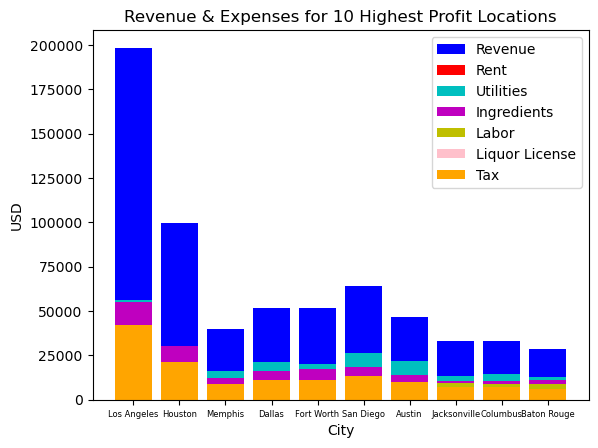

In [27]:
# Let's use the top 10 to make a stacked bar chart of our expenses. 
plt.bar(top_ten_cities['City'], top_ten_cities["Monthly Revenue (USD)"], color='b')
plt.bar(top_ten_cities['City'], top_ten_cities["Rent"], color='r')
plt.bar(top_ten_cities['City'], top_ten_cities["Utilities"], color='c',bottom=top_ten_cities["Rent"])
plt.bar(top_ten_cities['City'], top_ten_cities["Ingredients"], color='m',bottom=top_ten_cities["Utilities"])
plt.bar(top_ten_cities['City'], top_ten_cities["Labor"], color='y',bottom=top_ten_cities["Ingredients"])
plt.bar(top_ten_cities['City'], top_ten_cities["Liquor License"], color='pink',bottom=top_ten_cities["Labor"])
plt.bar(top_ten_cities['City'], top_ten_cities["Tax"], color='orange',bottom=top_ten_cities["Liquor License"])

plt.tick_params(axis='x', labelsize=6)
plt.title('Revenue & Expenses for 10 Highest Profit Locations')
plt.ylabel('USD')
plt.xlabel('City')
plt.legend(["Revenue","Rent","Utilities","Ingredients","Labor","Liquor License","Tax"])

# Save the figure
filename=os.path.join('..', 'Outputs', 'ProductionCostBar.png')
plt.savefig(filename)
    
plt.show()

In [22]:
# I also want to group the summary dataframe by state, take the average profit margin, and make those into a bar graph.
margin_by_state=pd.DataFrame(cost_detail_df.groupby("State")['Profit Margin'].mean())

<AxesSubplot:xlabel='State'>

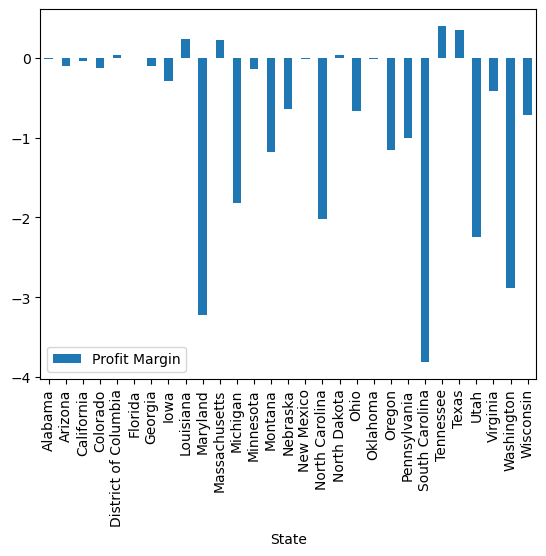

In [23]:
margin_by_state.plot(kind='bar')